In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Databases/Week 7/vehicles.csv')

In [ ]:
df.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


# Pearson
Supuestos: 

1. Muestra Aleatoria: debe representar una población de manera represantitiva.
2. Las variables sean datos continuos: Deben ser variables medidas en escala continua (Peso, temperatura, Velocidad). No usar varibables como categorias 
3. Todos los datos tengan su equivalente: Cada valor x tenga su equivalente y
4. Son independientes: 
5. Exista una asociación lineal
6. No tener outliers

In [ ]:
#Covarianza
#Entre más negativo, mayor relacion negativa. +positivo, +relacion positiva
#No son estandarizados
df.cov()

,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Year,101.713065,0.519273,1.459896,-9.960687,7.783484,15.878169,10.556963,-266.928999,-469.934524
Engine Displacement,0.519273,1.847956,2.151927,4.796011,-4.799797,-5.726053,-5.189978,130.050228,530.429000
Cylinders,1.459896,2.151927,3.080967,5.798763,-5.892401,-6.724015,-6.269421,157.237699,692.437947
Fuel Barrels/Year,-9.960687,4.796011,5.798763,19.956615,-18.701400,-23.938899,-20.777227,524.532182,2074.962381
City MPG,7.783484,-4.799797,-5.892401,-18.701400,22.746688,25.956318,24.028256,-507.729799,-2076.084458
Highway MPG,15.878169,-5.726053,-6.724015,-23.938899,25.956318,34.702424,29.194757,-649.754558,-2542.658340
Combined MPG,10.556963,-5.189978,-6.269421,-20.777227,24.028256,29.194757,26.136725,-563.783910,-2268.286203
CO2 Emission Grams/Mile,-266.928999,130.050228,157.237699,524.532182,-507.729799,-649.754558,-563.783910,14175.467724,56185.983710
Fuel Cost/Year,-469.934524,530.429000,692.437947,2074.962381,-2076.084458,-2542.658340,-2268.286203,56185.983710,257007.049913


In [ ]:
#Covarianza hace parte de la correlacion
df.corr()

,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Year,1.000000,0.037876,0.082469,-0.221084,0.161818,0.267259,0.204751,-0.222300,-0.091913
Engine Displacement,0.037876,1.000000,0.901858,0.789752,-0.740317,-0.715039,-0.746782,0.803520,0.769678
Cylinders,0.082469,0.901858,1.000000,0.739517,-0.703866,-0.650287,-0.698648,0.752393,0.778153
Fuel Barrels/Year,-0.221084,0.789752,0.739517,1.000000,-0.877752,-0.909664,-0.909743,0.986189,0.916208
City MPG,0.161818,-0.740317,-0.703866,-0.877752,1.000000,0.923856,0.985457,-0.894139,-0.858645
Highway MPG,0.267259,-0.715039,-0.650287,-0.909664,0.923856,1.000000,0.969392,-0.926405,-0.851404
Combined MPG,0.204751,-0.746782,-0.698648,-0.909743,0.985457,0.969392,1.000000,-0.926229,-0.875185
CO2 Emission Grams/Mile,-0.222300,0.803520,0.752393,0.986189,-0.894139,-0.926405,-0.926229,1.000000,0.930865
Fuel Cost/Year,-0.091913,0.769678,0.778153,0.916208,-0.858645,-0.851404,-0.875185,0.930865,1.000000


In [ ]:
df_makers = df.groupby(['Make']).agg({'Engine Displacement':'mean','City MPG':'mean'}).reset_index()

In [ ]:
x = df_makers['Engine Displacement']
y = df_makers['City MPG']

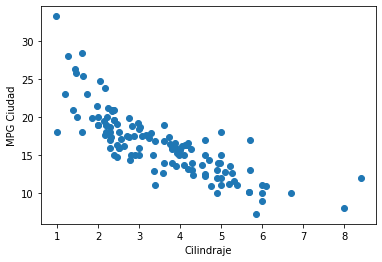

In [ ]:
plt.xlabel('Cilindraje')
plt.ylabel('MPG Ciudad')
plt.scatter(x,y)

{'whiskers': [<matplotlib.lines.Line2D object at 0x7f9a51ba0990>, <matplotlib.lines.Line2D object at 0x7f9a51ba0ed0>, <matplotlib.lines.Line2D object at 0x7f9a51b2ef50>, <matplotlib.lines.Line2D object at 0x7f9a51b35490>], 'caps': [<matplotlib.lines.Line2D object at 0x7f9a51ba6450>, <matplotlib.lines.Line2D object at 0x7f9a51ba6990>, <matplotlib.lines.Line2D object at 0x7f9a51b359d0>, <matplotlib.lines.Line2D object at 0x7f9a51b35f10>], 'boxes': [<matplotlib.lines.Line2D object at 0x7f9a51b73990>, <matplotlib.lines.Line2D object at 0x7f9a51b2ea10>], 'medians': [<matplotlib.lines.Line2D object at 0x7f9a51ba6f10>, <matplotlib.lines.Line2D object at 0x7f9a51b3d490>], 'fliers': [<matplotlib.lines.Line2D object at 0x7f9a51b2e490>, <matplotlib.lines.Line2D object at 0x7f9a51b3d9d0>], 'means': []}


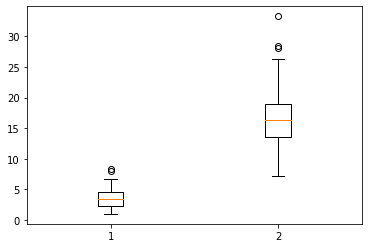

In [ ]:
print(plt.boxplot([x,y]))

In [ ]:
df_descriptive = df_makers.describe()
df_descriptive

,Engine Displacement,City MPG
count,127.000000,127.000000
mean,3.506438,16.482247
std,1.460354,4.298447
min,0.980000,7.250000
25%,2.340712,13.618545
50%,3.350000,16.285714
75%,4.600000,18.945364
max,8.400000,33.300000


In [ ]:
q1_engine_displacement = float(df_descriptive.loc[['25%'],['Engine Displacement']].values[0])
q3_engine_displacement = float(df_descriptive.loc[['75%'],['Engine Displacement']].values[0])
q1_mpg = float(df_descriptive.loc[['25%'],['City MPG']].values[0])
q3_mpg = float(df_descriptive.loc[['75%'],['City MPG']].values[0])

In [ ]:
iqr_engine_displacement = q3_engine_displacement - q1_engine_displacement
iqr_mpg = q3_mpg - q1_mpg

In [ ]:
upper_engine_displacement = q3_engine_displacement + (1.5*iqr_engine_displacement)
upper_mpg = q3_mpg + (1.5*iqr_mpg)

In [ ]:
upper_mpg

26.935593694618042

In [ ]:
df_clean = df_makers[(df_makers['Engine Displacement']< upper_engine_displacement) & (df_makers['City MPG']<upper_mpg)]

In [ ]:
df_corr = df_clean.corr()
# 67% de la variabilidad de City MPG es explicada por la variabilidad en Engine Displacemente.
# 33 % restante son factores externos (año del auto, fabricante, modelo, transmision....)
df_corr.iloc[0][1]**2*100

67.38766101826177

In [ ]:
corr_mat = np.corrcoef(df_clean['Engine Displacement'],df_clean['City MPG'])
corr_mat

array([[ 1.        , -0.82089988],
       [-0.82089988,  1.        ]])

In [ ]:
corr_mat[0,1]**2*100

67.38766101826177

# Spearman
Supuestos:
1. Muestra Aleatoria
2. Relación monotonica
3. Si acepta variables ordinales: Ranking de podio, performance de usuario. No es ideal usarla para variables nominales (Tipo de sangre, sexo, etc...)
4. Cada variable tiene si equivalente
5. Son observaciones independientes


In [ ]:
from scipy.stats import rankdata
df_clean['ranking_engine_displacement'] = rankdata(df_clean['Engine Displacement'], method='min')
df_clean['ranking_engine_city'] = rankdata(df_clean['City MPG'], method='min')
df_clean.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Make,Engine Displacement,City MPG,ranking_engine_displacement,ranking_engine_city
0,AM General,3.350000,15.000000,61,41
1,ASC Incorporated,3.800000,14.000000,72,33
2,Acura,2.834768,18.890728,49,93
3,Alfa Romeo,2.556098,17.097561,42,73
4,American Motors Corporation,3.813636,16.045455,73,59


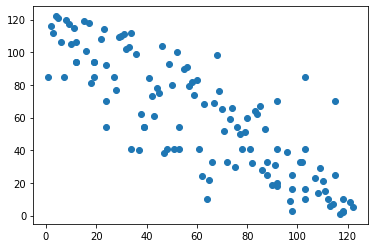

In [ ]:
x= df_clean['ranking_engine_displacement']
y= df_clean['ranking_engine_city']
plt.scatter(x,y)

In [ ]:
df_spearman = df_clean[['Make','ranking_engine_displacement','ranking_engine_city']]

In [ ]:
df_spearman.head()

,Make,ranking_engine_displacement,ranking_engine_city
0,AM General,61,41
1,ASC Incorporated,72,33
2,Acura,49,93
3,Alfa Romeo,42,73
4,American Motors Corporation,73,59


In [ ]:
df_spearman.corr('spearman')

,ranking_engine_displacement,ranking_engine_city
ranking_engine_displacement,1.00000,-0.83562
ranking_engine_city,-0.83562,1.00000


In [ ]:
stats.spearmanr(df_spearman[['ranking_engine_displacement','ranking_engine_city']])

SpearmanrResult(correlation=-0.8356204783793975, pvalue=5.1969294990845706e-33)

In [ ]:
#Kendall
# Es una alternativa a PEarson cuando fallamos en un supuesto. 
# Es una alternativa a Spearman si tenemos pocos datos y muchos rankings "empatados"
df_spearman.corr('kendall')

,ranking_engine_displacement,ranking_engine_city
ranking_engine_displacement,1.000000,-0.654468
ranking_engine_city,-0.654468,1.000000


In [ ]:
import seaborn as sns

In [ ]:
df_continuo = df_clean[['Engine Displacement','City MPG']]

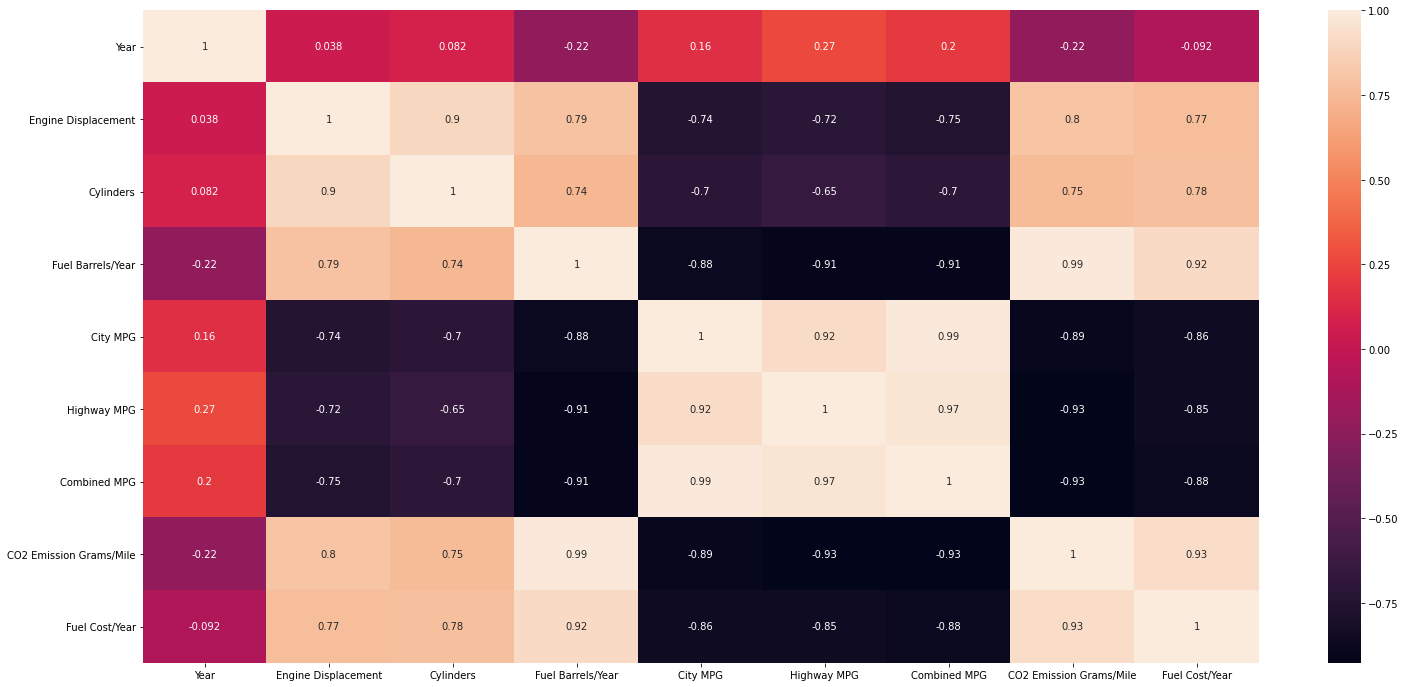

In [ ]:
plt.figure(figsize=(25,12))
sns.heatmap(df.corr(), annot= True)

In [ ]:
mask = np.zeros_like(df.corr())

In [ ]:
def correlation_plot(corr, title="Heatma"):
  mask = np.zeros_like(df.corr(),dtype=np.bool)
  # Nos regresa la matriz diagonal superior
  mask[np.triu_indices_from(mask)] = True
  plt.subplots(figsize=(15,10))
  cmap = sns.diverging_palette(6,255, as_cmap=True)
  chart = sns.heatmap(corr, mask = mask, cmap = cmap, center = 0, linewidth = .5, annot = True)
  plt.title(title, fontsize=15)
  return chart

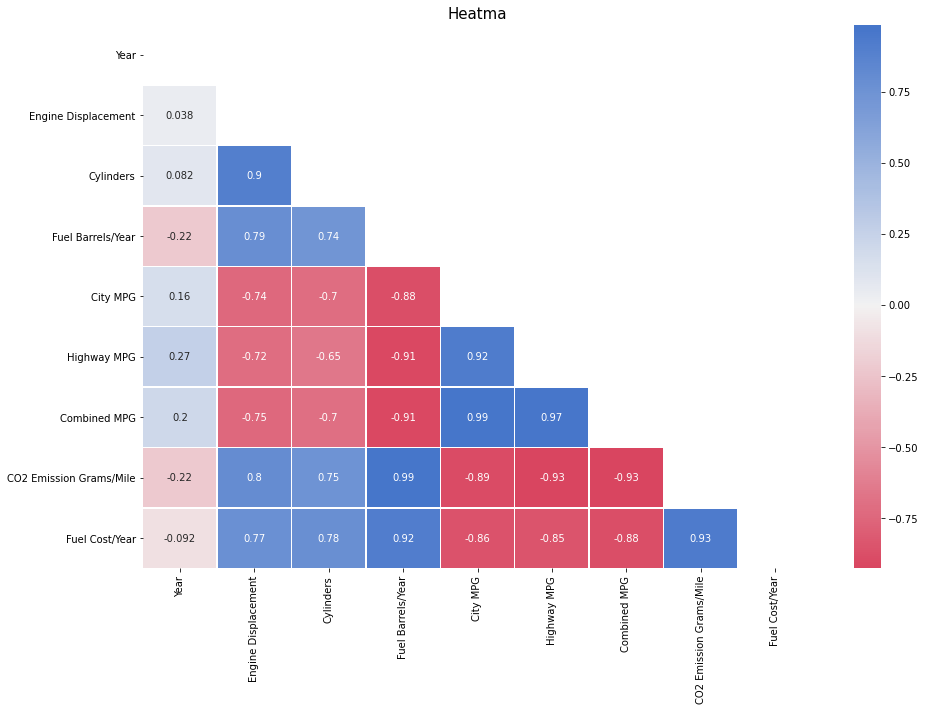

In [ ]:
correlation_plot(df.corr())